# Example with harmonics fit

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import specpolFlow as pol

plt.rcParams.update({'font.size':13})

In [2]:
import BzFit_module as m 
import pandas as pd
import scipy.optimize as opt

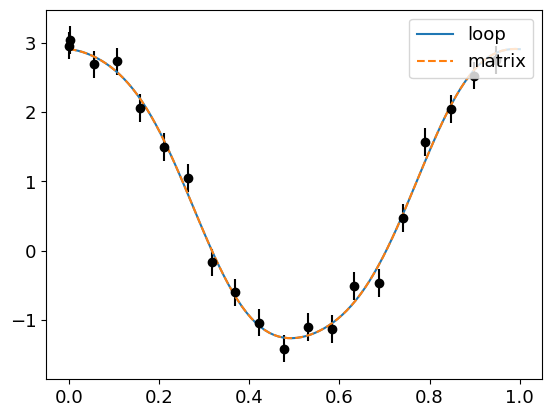

In [3]:
phase = np.load('phase.npy')
Bz = np.load('Bz.npy')
n = Bz.size
sigma = 0.2
data = m.data(phase, Bz, np.ones(n)*sigma)

P = 1.0
jd0 = 0

phi = data.foldphase(P,jd0)

fig, ax = plt.subplots(1,1)
ax.errorbar(phi, data.val, data.val_err,
            ls='', fmt='o', c='k')


model_fit, fitErr, chi2, chi2nu = m.harmonic_fit(data, P, jd0, 7)

phi_arr = np.linspace(0,1,100)

ax.plot(phi_arr, model_fit.get_model_loop(phi_arr*2*np.pi), label='loop')
ax.plot(phi_arr, model_fit.get_model_matrix(phi_arr*2*np.pi), label='matrix', ls='--')

ax.legend(loc=1)